## 1. Carregamento das bibliotecas

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

## 2. Carregamento dos Dados

In [23]:
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"joaodiamantino","key":"35e23b44586e8d322e8346a98100dccb"}'}

In [24]:
#antes de importar o dataset nós iremos provisionar o local de armazenamento
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d arjunbhasin2013/ccdata
! chmod 600 /root/.kaggle/kaggle.json


ccdata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
!unzip -uq "/content/ccdata.zip"

In [26]:
df = pd.read_csv("CC GENERAL.csv")

## 3. Limpeza dos Dados

In [27]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


CUSTID : Identification of Credit Card holder (Categorical)

---


BALANCE : Balance amount left in their account to make
purchases


---


BALANCEFREQUENCY : How frequently the Balance is updated,
score between 0 and 1 (1 = frequently updated, 0 = not
frequently updated)

---


PURCHASES : Amount of purchases made from account

---


ONEOFFPURCHASES : Maximum purchase amount done in
one-go

---


INSTALLMENTSPURCHASES : Amount of purchase done in
installment

---


CASHADVANCE : Cash in advance given by the user

---


PURCHASESFREQUENCY : How frequently the Purchases are
being made, score between 0 and 1 (1 = frequently purchased, 0
= not frequently purchased)

---


ONEOFFPURCHASESFREQUENCY : How frequently Purchases
are happening in one-go (1 = frequently purchased, 0 = not
frequently purchased)

---


PURCHASESINSTALLMENTSFREQUENCY : How frequently
purchases in installments are being done (1 = frequently done, 0
= not frequently done)

---


CASHADVANCEFREQUENCY : How frequently the cash in
advance being paid

---


CASHADVANCETRX : Number of Transactions made with "Cash
in Advanced"

---


PURCHASESTRX : Numbe of purchase transactions made

---


CREDITLIMIT : Limit of Credit Card for user

---


PAYMENTS : Amount of Payment done by user

---


MINIMUM_PAYMENTS : Minimum amount of payments made
by user

---


PRCFULLPAYMENT : Percent of full payment paid by user

---


TENURE : Tenure of credit card service for user

---



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [29]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 3.1 Removendo dados não importantes

In [30]:
df.drop(columns = "CUST_ID", inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3.2 Preenchendo valores faltantes

In [31]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].min(), inplace = True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].min(), inplace = True)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### 3.3 Removendo outliers

In [33]:
from scipy import stats

df_columns_out_list = ['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS',
                      'CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES',
                      'CASH_ADVANCE','CASH_ADVANCE_TRX']
df_test = df
for col in range(0,len(df_columns_out_list)):
    df_columns_out = df_test[df_columns_out_list[col]]
    z=np.abs(stats.zscore(df_columns_out))
    df_test = df_test[z<2]
    print(df_test.shape)


(8459, 17)
(8203, 17)
(8069, 17)
(7769, 17)
(7374, 17)
(7035, 17)
(6659, 17)
(6303, 17)
(6009, 17)


In [34]:
df_test.shape

(6009, 17)

In [35]:
df_test.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000,6009.000000
mean,900.039441,0.848787,473.941200,202.902015,271.349835,390.269277,0.457115,0.133442,0.346308,0.086196,1.469962,8.428025,3113.361666,862.748826,426.315246,0.152457,11.468963
std,1101.558116,0.260478,581.256188,340.633742,458.259076,695.272361,0.389063,0.231992,0.386084,0.132549,2.359812,9.214047,2153.088893,860.719795,555.235651,0.290125,1.409525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,61.653547,0.818182,37.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,296.967289,139.614749,0.000000,12.000000
50%,468.022403,1.000000,276.000000,0.000000,74.400000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,582.050862,208.550713,0.000000,12.000000
75%,1347.505936,1.000000,689.400000,280.000000,365.150000,472.818286,0.875000,0.166667,0.750000,0.166667,2.000000,12.000000,4000.000000,1127.409110,500.848096,0.142857,12.000000
max,5709.486507,1.000000,4723.840000,1462.380000,4538.840000,3180.893742,1.000000,1.000000,1.000000,1.166667,10.000000,43.000000,9700.000000,5401.287094,4287.236670,1.000000,12.000000


## 4. Análise dos Dados

### 4.1 Correlação

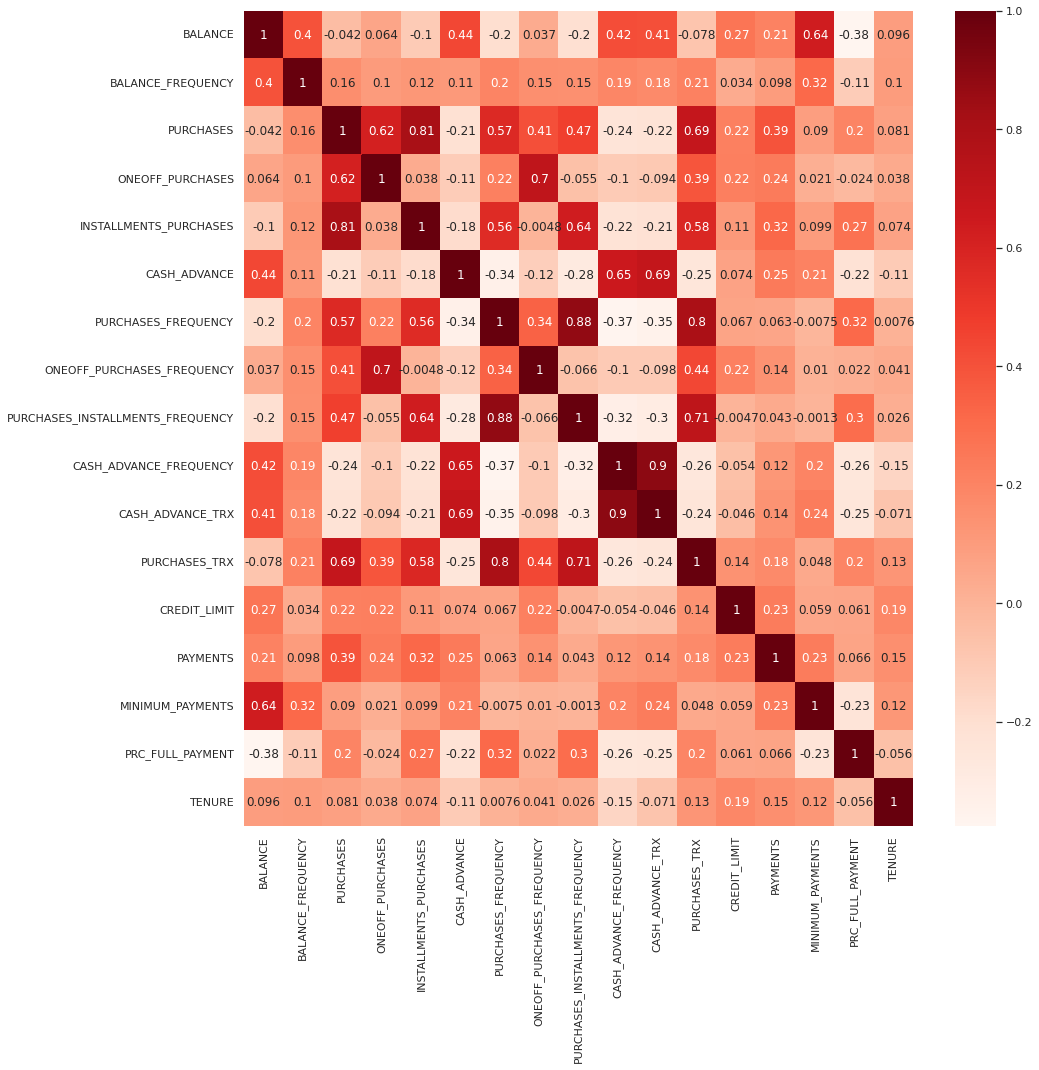

In [36]:
# Creating a matrix using all data as rows and columns
df_test.corr()
# ploting the correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_test.corr(), annot=True, cmap = 'Reds')
plt.show()

In [37]:
corr_list = {}
 
for col1 in range(len(df_test.columns)):
  for col2 in range(len(df_test.columns)):
    if col1 == col2:
      continue
      # usando o continue para ignorar correlação de colunas iguais
      # poderia causar erro na seleção do valor da correlação especifica no dataframe 'corr_count' por ter 2 colunas iguais
    column_name = df_test.columns[col1]
    corr_count = df_test[[df_test.columns[col1],df_test.columns[col2]]].corr().reset_index(drop=True)[column_name][1]
    
    cols = df_test.columns[col1]+ "," +df_test.columns[col2]
    
    corr_list.update({cols:corr_count})

corr_ranking = pd.DataFrame(corr_list.items(), columns = ['Colunas', 'Correlação'])



In [38]:
corr_ranking.sort_values(by = 'Correlação', ascending=False).head(10)


,Colunas,Correlação
153,"CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX",0.896004
169,"CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY",0.896004
103,"PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FRE...",0.879910
134,"PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FRE...",0.879910
66,"INSTALLMENTS_PURCHASES,PURCHASES",0.810350
35,"PURCHASES,INSTALLMENTS_PURCHASES",0.810350
182,"PURCHASES_TRX,PURCHASES_FREQUENCY",0.800615
106,"PURCHASES_FREQUENCY,PURCHASES_TRX",0.800615
138,"PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX",0.713382
184,"PURCHASES_TRX,PURCHASES_INSTALLMENTS_FREQUENCY",0.713382


In [39]:
# maiores correlações com o CREDIT_LIMIT

df_test.corr()['CREDIT_LIMIT'].abs().sort_values(ascending=False)

CREDIT_LIMIT                        1.000000
BALANCE                             0.268402
PAYMENTS                            0.232971
ONEOFF_PURCHASES                    0.221455
PURCHASES                           0.218244
ONEOFF_PURCHASES_FREQUENCY          0.216329
TENURE                              0.186174
PURCHASES_TRX                       0.144282
INSTALLMENTS_PURCHASES              0.112187
CASH_ADVANCE                        0.073773
PURCHASES_FREQUENCY                 0.066831
PRC_FULL_PAYMENT                    0.060905
MINIMUM_PAYMENTS                    0.059017
CASH_ADVANCE_FREQUENCY              0.053789
CASH_ADVANCE_TRX                    0.046392
BALANCE_FREQUENCY                   0.033645
PURCHASES_INSTALLMENTS_FREQUENCY    0.004719
Name: CREDIT_LIMIT, dtype: float64

## 5. Clusterização

### 5.1 Standartização dos dados

In [40]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df_test)

### 5.2 Método do cotovelo para definição de K ótimo

In [43]:
from sklearn.cluster import KMeans
inertias = []
K = range(1, 10)
from scipy.spatial.distance import cdist
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(normalized_df)
    inertias.append(kmeanModel.inertia_)

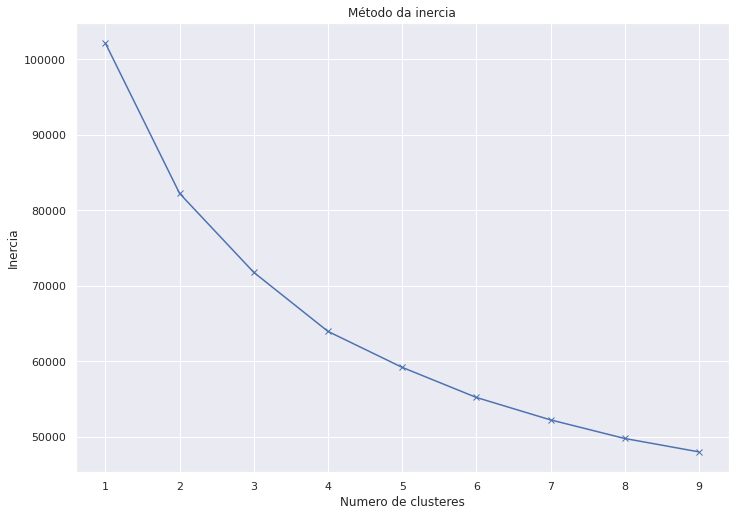

In [44]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.title('Método da inercia')
plt.show()

### 5.3 Treinando o modelo com 4 clusteres

In [45]:
model = KMeans(4,random_state=42) 
labels = model.fit_predict(normalized_df) 

In [46]:
df_test['clusters']=labels # atribuindo pra cada cliente o seu devido cluster
df_test['clusters']=df_test['clusters'].astype(str)

### 5.4 Analisando os clusteres

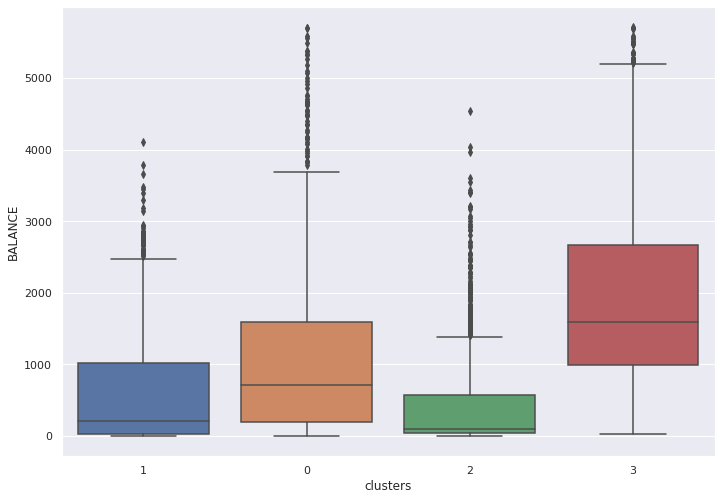

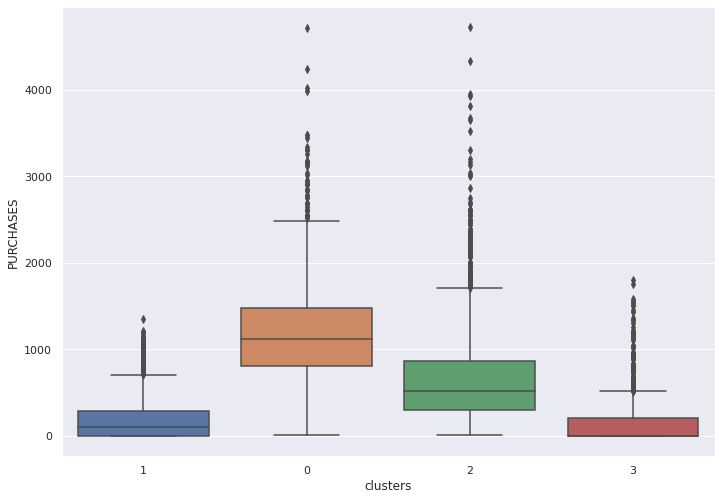

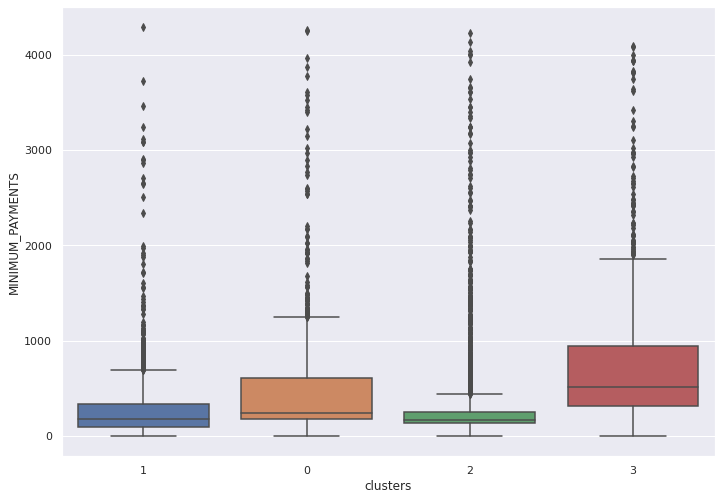

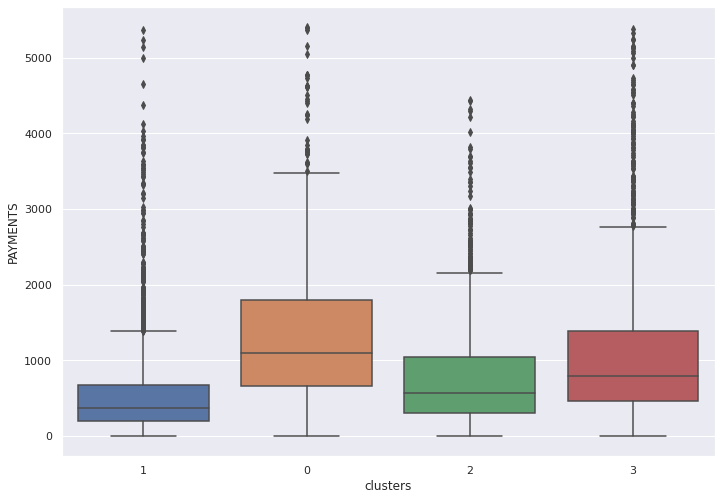

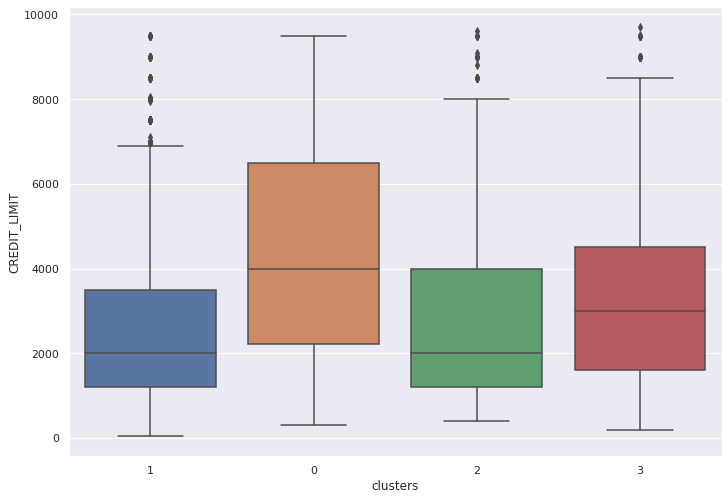

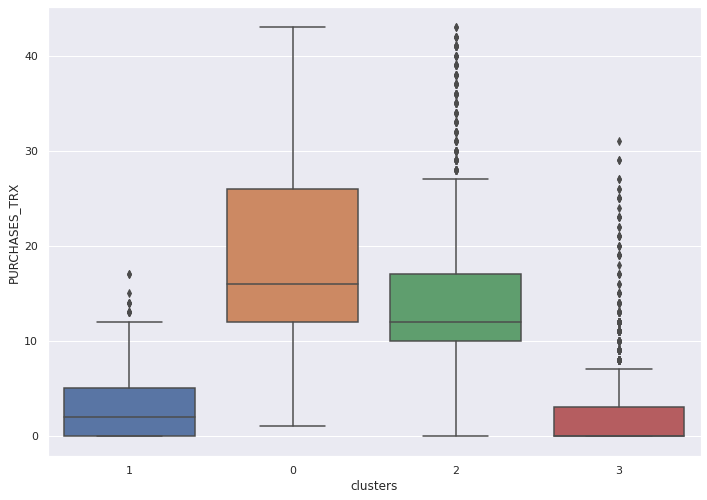

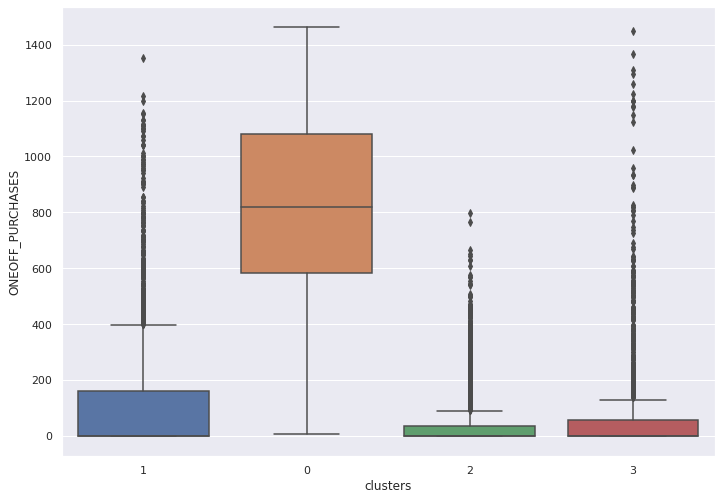

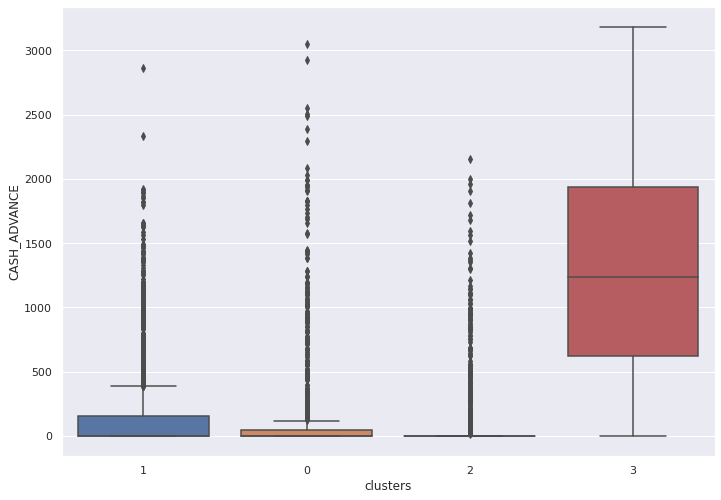

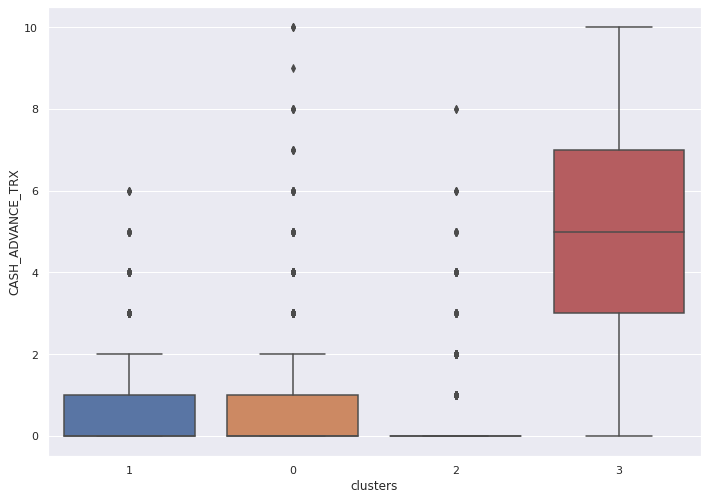

In [47]:
for y in df_columns_out_list:

  sns.boxplot(x="clusters", y=y, data=df_test)
  plt.show()

Ao observar os clusteres e a descrição de cada variável, temos algumas variáveis que os boxplots mostram diferenças entre populações de forma que podemos criar 4 perfis. Um fato a ser observado é que tem muitos outliers quando se compara entre clusteres.

O primeiro perfil é o cliente contido (cluster 1), pois ele não compra muito em valor, não compra muito em quantidade e não paga adiantado. 

O segundo perfil é o cliente comprador (cluster 0) pois ele compra muito em valor, compra muito em quantidade mas não paga adiantado. 

O terceiro perfil que podemos construir (cluster 2) é o cliente em ascensão pois ele começando a comprar mais porém ainda compra em quantidade normal mas não paga adiantado. 

O quarto perfil é o cliente não devedor (cluster 3) pois apesar de ser muito parecido com o cliente contido, esse cliente paga sempre adiantado as suas compras.

In [48]:
df_test.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12,2


In [49]:
df_test['clusters'].value_counts()

1    2178
2    1642
3    1279
0     910
Name: clusters, dtype: int64

## 6. Regressão

### 6.1 Dummificando os dados

In [53]:
# utilizando o get.dummies do pandas

df_dummies = pd.get_dummies(df_test['clusters'])
df_dummies['CREDIT_LIMIT'] = df_test['CREDIT_LIMIT']
df_dummies.head()

,0,1,2,3,CREDIT_LIMIT
0,0,1,0,0,1000.0
2,1,0,0,0,7500.0
4,0,1,0,0,1200.0
5,0,0,1,0,1800.0
7,0,0,1,0,2300.0


### 6.2 Separando Treino e Teste

In [56]:
# Separar os valores de atributo e alvo
X = df_dummies.iloc[:,:-1]
y = df_dummies[['CREDIT_LIMIT']]

# Separar o conjunto em Treino/ Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### 6.3 Treinando o modelo

In [58]:
from sklearn.linear_model import LinearRegression
# Chamar a função do Modelo para cada variável
LinReg1 = LinearRegression()

# Treinar o modelo

LinReg1.fit(X_train,y_train)

# Predizer os valores de teste

y_pred_1 = LinReg1.predict(X_test )

### 6.4 Calculando as métricas do modelo

In [60]:
# Calcular as métricas do modelo
from sklearn import metrics
print("Fórmula: y = {} {} x".format(LinReg1.intercept_,LinReg1.coef_[0]))
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred_1)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred_1)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred_1)))

Fórmula: y = [-6.4608133e+15] [6.4608133e+15 6.4608133e+15 6.4608133e+15 6.4608133e+15] x
MSE: 1606.4596379775373
RMSE: 3996108.7399227526
R²: 0.06590625038740361
